In [1]:
# pip install opencv-python
import skimage
from skimage.exposure import rescale_intensity
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]

    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = int((kW - 1) / 2)
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")

    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()

            # store the convolved value in the output (x,y)-
            # coordinate of the output image
            output[y - pad, x - pad] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image
    return output


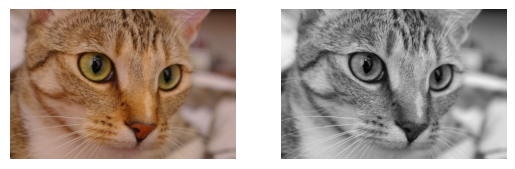

In [3]:
image = image = skimage.data.chelsea()
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

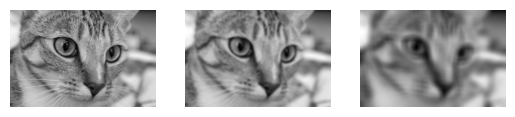

In [4]:
# 模糊化(Blur)
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')

# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
convoleOutput = convolve(gray, smallBlur)
opencvOutput = cv2.filter2D(gray, -1, smallBlur)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(convoleOutput, cmap='gray')

largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
convoleOutput = convolve(gray, largeBlur)
opencvOutput = cv2.filter2D(gray, -1, largeBlur)
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(convoleOutput, cmap='gray')
plt.show()

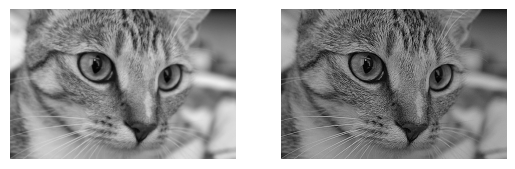

In [5]:
# 銳化
# construct a sharpening filter
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')

convoleOutput = convolve(gray, sharpen)
opencvOutput = cv2.filter2D(gray, -1, sharpen)
# show the output images
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(convoleOutput, cmap='gray')
plt.show()

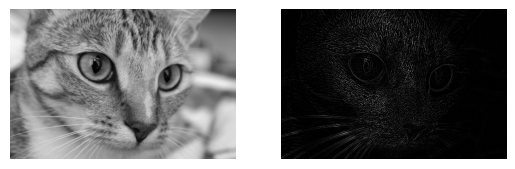

In [6]:
# 邊緣偵測
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')

# construct the Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

convoleOutput = convolve(gray, laplacian)
opencvOutput = cv2.filter2D(gray, -1, laplacian)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(opencvOutput, cmap='gray')
plt.show()

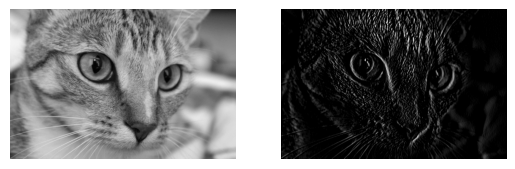

In [7]:
# X軸邊緣偵測
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')

# construct the Sobel x-axis kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

convoleOutput = convolve(gray, sobelX)
opencvOutput = cv2.filter2D(gray, -1, sobelX)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(opencvOutput, cmap='gray')
plt.show()

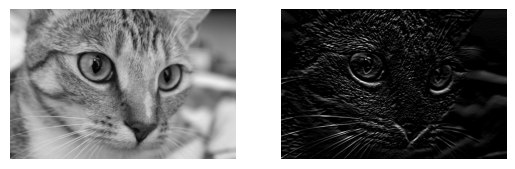

In [8]:
# Y軸邊緣偵測
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(gray, cmap='gray')

# construct the Sobel x-axis kernel
sobelY = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

convoleOutput = convolve(gray, sobelY)
opencvOutput = cv2.filter2D(gray, -1, sobelY)
# show the output images
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(opencvOutput, cmap='gray')
plt.show()

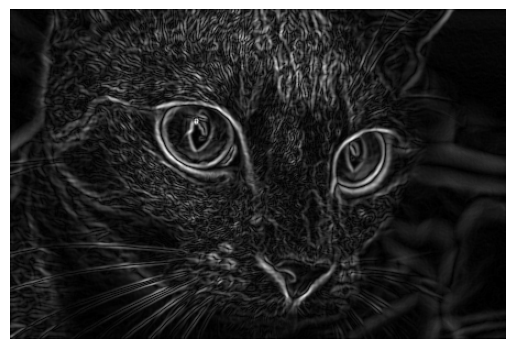

In [10]:
scale = 1
delta = 0
ddepth = cv2.CV_16S

# 轉換為灰階
src = cv2.GaussianBlur(image, (3, 3), 0)   
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)

# X軸邊緣偵測
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
# Y軸邊緣偵測
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

# 圖像增強
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# X軸邊緣與Y軸邊緣合成
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# 按 Enter 關閉視窗
# cv2.imshow("Sobel testing", grad)
# cv2.waitKey(0);

plt.axis('off')
plt.imshow(grad, cmap='gray')
plt.show()